In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Import data
bikeshare_Feb2020=pd.read_csv('202002-baywheels-tripdata.csv')

/Users/yeyinghuang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
bikeshare_Feb2020.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


In [4]:
bikeshare_Feb2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
duration_sec               432354 non-null int64
start_time                 432354 non-null object
end_time                   432354 non-null object
start_station_id           161723 non-null float64
start_station_name         161723 non-null object
start_station_latitude     432354 non-null float64
start_station_longitude    432354 non-null float64
end_station_id             162194 non-null float64
end_station_name           162194 non-null object
end_station_latitude       432354 non-null float64
end_station_longitude      432354 non-null float64
bike_id                    432354 non-null int64
user_type                  432354 non-null object
rental_access_method       317843 non-null object
dtypes: float64(6), int64(2), object(6)
memory usage: 46.2+ MB


# Trips from 4th&King during Morning Commute

In [5]:
import datetime
from datetime import date

In [6]:
# Convert timestamp to date
bikeshare_Feb2020['start_time']=pd.to_datetime(bikeshare_Feb2020['start_time'])

In [7]:
# Extract the day from datetime
bikeshare_Feb2020['start_date']=bikeshare_Feb2020['start_time'].dt.day

In [8]:
bikeshare_Feb2020.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,start_date
0,62083,2020-02-29 18:32:30.575,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN,29
1,1364,2020-02-29 23:53:53.719,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN,29
2,836,2020-02-29 23:54:03.197,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN,29
3,1004,2020-02-29 23:48:34.648,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN,29
4,1007,2020-02-29 23:48:25.900,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN,29


In [9]:
# There are two bikeshare stations near Caltrain station
four_king=bikeshare_Feb2020[(bikeshare_Feb2020['start_station_id']==30.0)|
                            (bikeshare_Feb2020['start_station_id']==465.0)]

In [10]:
# Sort by date to find out the peak-of-the-peak
four_king['start_date'].value_counts()

26    260
24    242
25    227
3     223
27    222
4     211
21    192
28    192
10    176
18    164
19    157
12    155
11    149
20    146
6     145
13    143
14    135
7     126
5     124
1      62
2      55
17     54
8      52
22     46
16     36
23     35
15     34
29     33
9      29
Name: start_date, dtype: int64

In [11]:
# Extract trip starting time within morning commute hours (7:30-9:30)
four_king_commute=four_king[four_king['start_time'].between(
    datetime.datetime(2020, 2, 26, 7, 30, 0),
    datetime.datetime(2020, 2, 26, 9, 30, 0))]

In [12]:
four_king_commute.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 17502 to 273260
Data columns (total 15 columns):
duration_sec               67 non-null int64
start_time                 67 non-null datetime64[ns]
end_time                   67 non-null object
start_station_id           67 non-null float64
start_station_name         67 non-null object
start_station_latitude     67 non-null float64
start_station_longitude    67 non-null float64
end_station_id             65 non-null float64
end_station_name           65 non-null object
end_station_latitude       67 non-null float64
end_station_longitude      67 non-null float64
bike_id                    67 non-null int64
user_type                  67 non-null object
rental_access_method       2 non-null object
start_date                 67 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(3), object(5)
memory usage: 8.4+ KB


In [13]:
# Convert to geodataframe
four_king_commute_des= gpd.GeoDataFrame(
    four_king_commute, geometry=gpd.points_from_xy(four_king_commute.end_station_longitude, four_king_commute.end_station_latitude))

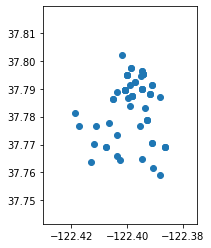

In [14]:
four_king_commute_des.plot()

In [15]:
# Have to drop the timestamp when exporting to GeoJson format
four_king_commute_des=four_king_commute_des.drop(columns=['start_time','end_time'])

In [16]:
four_king_commute_des.to_file('20200226_from_4th&king_destination_AMPeak', driver="GeoJSON")

# Export all day bikeshare trips

In [17]:
bikeshare_Feb26=bikeshare_Feb2020[bikeshare_Feb2020['start_date']==26]

In [18]:
bikeshare_Feb26.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,start_date
10715,58179,2020-02-26 21:35:14.753,2020-02-27 13:44:54.5180,10.0,Washington St at Kearny St,37.795393,-122.404770,449.0,16th Depot Bike Fleet Station,0.000000,0.000000,12252,Customer,NaN,26
11142,47886,2020-02-26 22:21:32.722,2020-02-27 11:39:39.0300,241.0,Ashby BART Station,37.852477,-122.270213,241.0,Ashby BART Station,37.852477,-122.270213,3311,Customer,NaN,26
11616,63622,2020-02-26 16:06:39.632,2020-02-27 09:47:01.9820,9.0,Broadway at Battery St,37.798572,-122.400869,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1369,Customer,NaN,26
11919,82483,2020-02-26 10:22:26.899,2020-02-27 09:17:09.9670,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,387.0,Randall St at Chenery St,37.739813,-122.425523,12220,Customer,NaN,26
12170,52918,2020-02-26 18:17:06.220,2020-02-27 08:59:04.5860,171.0,Rockridge BART Station,37.844279,-122.251900,176.0,MacArthur BART Station,37.828410,-122.266315,11519,Customer,NaN,26


In [21]:
bikeshare_Feb262020= gpd.GeoDataFrame(
    bikeshare_Feb26, geometry=gpd.points_from_xy(bikeshare_Feb26.start_station_longitude, bikeshare_Feb26.start_station_latitude))

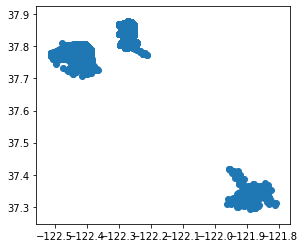

In [22]:
bikeshare_Feb262020.plot()

In [24]:
# Filter record in SF
bikeshare_Feb262020_clean_SF=bikeshare_Feb262020[
    (bikeshare_Feb262020['start_station_latitude'].between(37.6000,38.203300)) & 
    (bikeshare_Feb262020['start_station_longitude'].between(-122.6445,-122.3500))]

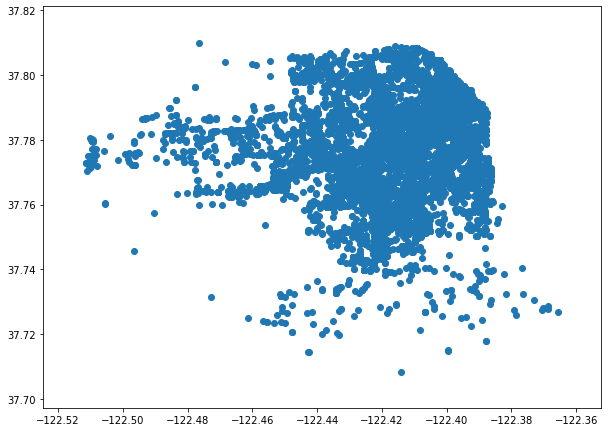

In [25]:
bikeshare_Feb262020_clean_SF.plot(figsize=(10,10))

In [26]:
bikeshare_Feb262020_clean_SF=bikeshare_Feb262020_clean_SF.drop(columns=['start_time','end_time'])

In [27]:
bikeshare_Feb262020_clean_SF.to_file('20200226_bikeshare_OD', driver="GeoJSON")